## Importing Dependencies

In [1]:
pip install pycountry

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px
import pycountry

In [3]:
df = pd.read_csv("/content/gapminder.csv")
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


## Data Exploration

In [4]:
#Observations and Variables
df.shape

(213, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               213 non-null    object
 1   incomeperperson       213 non-null    object
 2   alcconsumption        213 non-null    object
 3   armedforcesrate       213 non-null    object
 4   breastcancerper100th  213 non-null    object
 5   co2emissions          213 non-null    object
 6   femaleemployrate      213 non-null    object
 7   hivrate               213 non-null    object
 8   internetuserate       213 non-null    object
 9   lifeexpectancy        213 non-null    object
 10  oilperperson          213 non-null    object
 11  polityscore           213 non-null    object
 12  relectricperperson    213 non-null    object
 13  suicideper100th       213 non-null    object
 14  employrate            213 non-null    object
 15  urbanrate             213 non-null    ob

In [6]:
#Missing values
df.isnull().sum()

country                 0
incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
polityscore             0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

<Axes: >

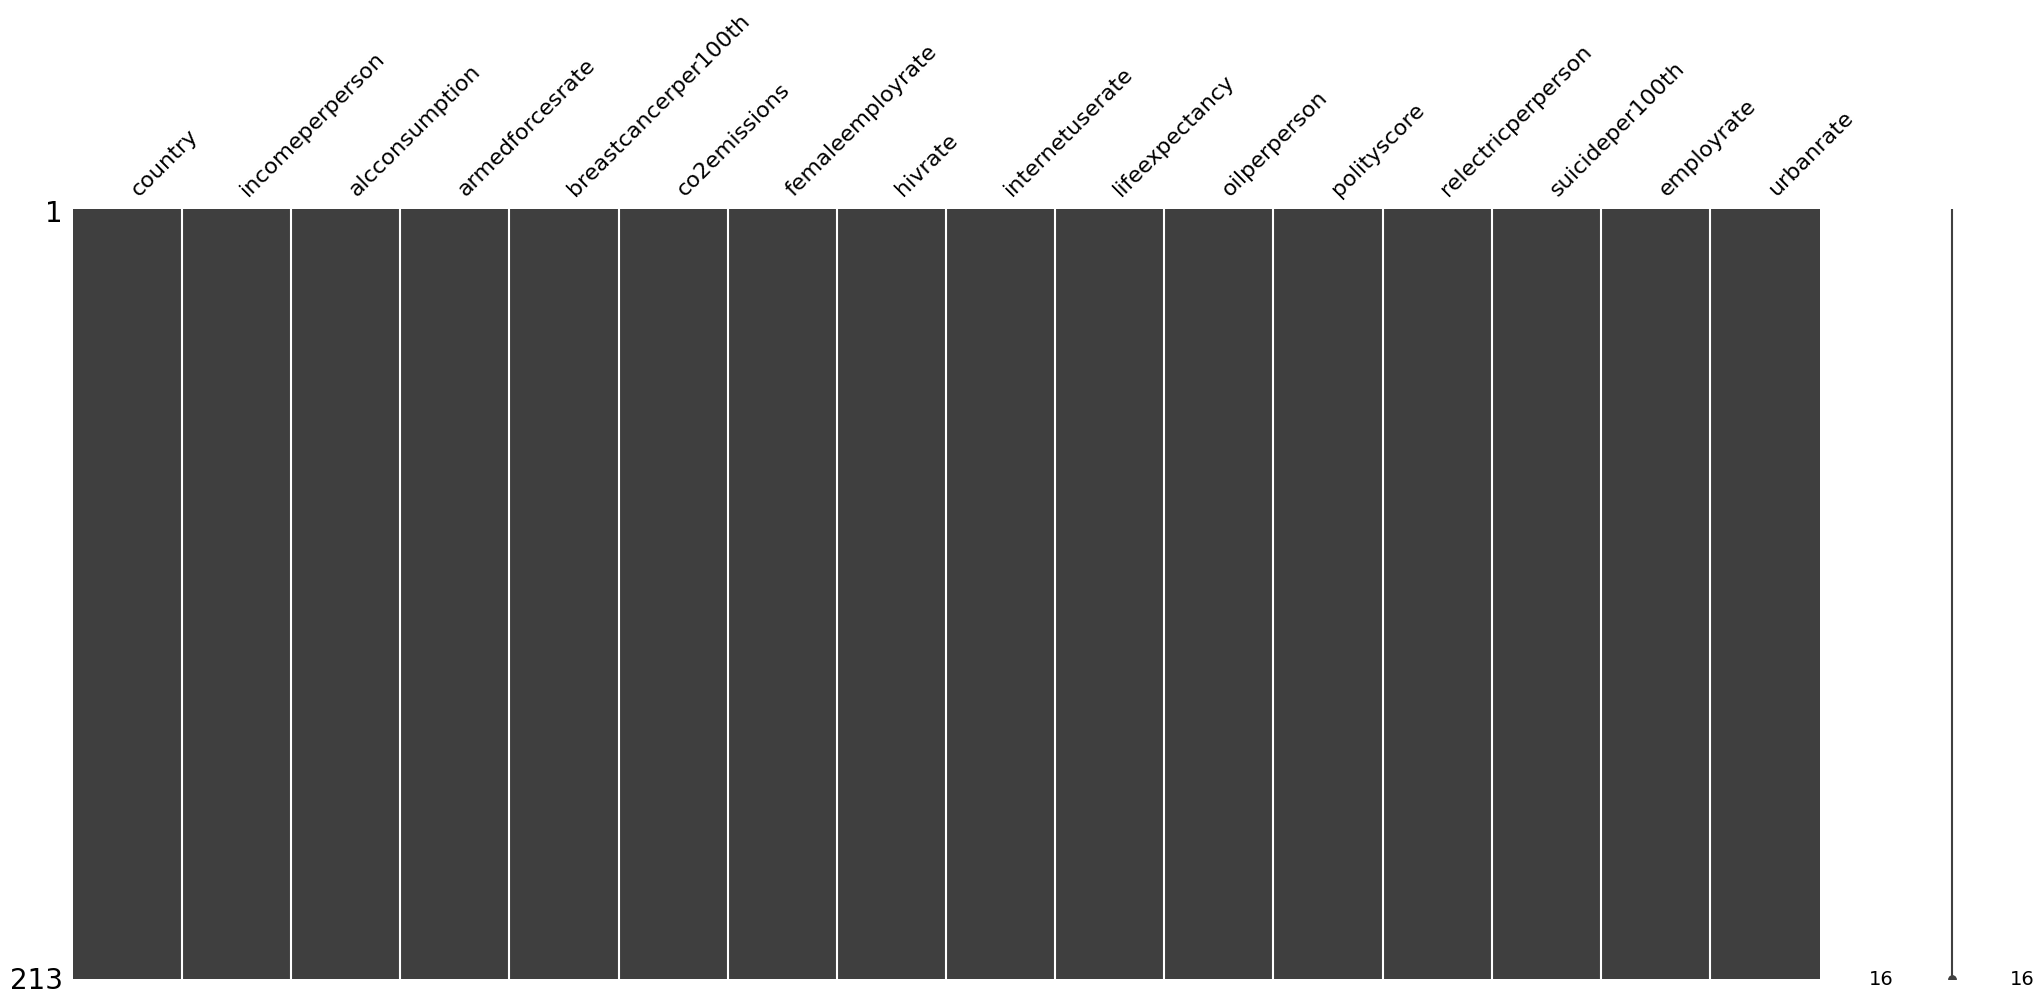

In [7]:
msno.matrix(df)

In [8]:
#Basic statistics
df.describe().T

,count,unique,top,freq
country,213,213,Afghanistan,1
incomeperperson,213,191,,23
alcconsumption,213,181,,26
armedforcesrate,213,165,,49
breastcancerper100th,213,137,,40
co2emissions,213,201,,13
femaleemployrate,213,154,,35
hivrate,213,47,,66
internetuserate,213,193,,21
lifeexpectancy,213,190,,22


## Handling Outliers using Tukey's Fences Method

In [9]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

## Feature Engineering

**We are going to add new column called countrycode because it will be usefull for the plot of our worldmap**

In [10]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', '

In [11]:
countries_dict = {}
for country in pycountry.countries:
    countries_dict[country.name] = country.alpha_3

print(countries_dict)

{'Aruba': 'ABW', 'Afghanistan': 'AFG', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Andorra': 'AND', 'United Arab Emirates': 'ARE', 'Argentina': 'ARG', 'Armenia': 'ARM', 'American Samoa': 'ASM', 'Antarctica': 'ATA', 'French Southern Territories': 'ATF', 'Antigua and Barbuda': 'ATG', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Benin': 'BEN', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Burkina Faso': 'BFA', 'Bangladesh': 'BGD', 'Bulgaria': 'BGR', 'Bahrain': 'BHR', 'Bahamas': 'BHS', 'Bosnia and Herzegovina': 'BIH', 'Saint Barthélemy': 'BLM', 'Belarus': 'BLR', 'Belize': 'BLZ', 'Bermuda': 'BMU', 'Bolivia, Plurinational State of': 'BOL', 'Brazil': 'BRA', 'Barbados': 'BRB', 'Brunei Darussalam': 'BRN', 'Bhutan': 'BTN', 'Bouvet Island': 'BVT', 'Botswana': 'BWA', 'Central African Republic': 'CAF', 'Canada': 'CAN', 'Cocos (Keeling) Islands': 'CCK', 'Switzerland': 'CHE', 'Chile': 'CHL', 'China': 'CHN', "Côte d'Iv

In [12]:
df['countrycode'] = df['country']
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,Afghanistan
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,Albania
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,Algeria
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,Andorra
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,Angola


In [13]:
df['countrycode'] = df['countrycode'].apply(lambda x: countries_dict[x] if x in countries_dict else 'Not found' )

In [14]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,AFG
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,ALB
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,DZA
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,AND
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,AGO


In [15]:
# check Not found in countrycode
df[df['countrycode'] =='Not found'].head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
22,Bolivia,1232.79413697982,5.78,1.8821978,24.7,254939666.666667,61.5999984741211,.2,20.0017101420083,66.618,,7,213.061613682625,2.0341784954071,70.4000015258789,65.58,Not found
26,Brunei,17092.460003775,1.86,4.683989,20.6,254206333.333333,55.5,,49.9899749373434,78.005,,,3067.49890103189,1.37000155448914,63.7999992370606,74.82,Not found
33,Cape Verde,1959.8444724473,4.98,.4833248,28.1,5214000,43.5999984741211,,29.999939516129,74.156,,,,5.63333368301392,55.9000015258789,59.62,Not found
35,Central African Rep.,239.518749365157,3.17,.1486587,16.5,8338000,62.9000015258789,4.7,2.3000266530334,48.398,,-1,,13.5484199523926,71.3000030517578,38.58,Not found
41,"Congo, Dem. Rep.",103.775857241166,3.39,.628381,10.3,169180000,50.4000015258789,,.720008677328886,48.397,,5,30.7092435483984,14.713020324707,66.1999969482422,33.96,Not found


**Since every data is important to me to I will find the country code for each country name**

In [16]:
df['countrycode'] = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT',
                    'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
                    'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
                    'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
                    'COM', 'COD', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
                    'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
                    'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
                    'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM',
                    'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
                    'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
                    'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO',
                    'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
                    'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
                    'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ',
                    'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL', 'NZL', 'NIC', 'NER',
                    'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
                    'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA',
                    'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SCG',
                    'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'ESP', 'LKA',
                    'SDN', 'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN',
                    'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM',
                    'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
                    'VNM', 'PSE', 'YEM', 'ZMB', 'ZWE']

In [17]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,AFG
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,ALB
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,DZA
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,AND
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,AGO


## Internet Use Rate.

**2010 Internet users (per 100 people): Internet users are people with access to the worldwide network.**

In [18]:
df["internetuserate"].value_counts()

                    21
3.65412162280064     1
93.2775079341379     1
49.0006318425088     1
4.17013638520735     1
                    ..
9.19677547715442     1
26.2972514824798     1
82.526897905279      1
9.54993070063956     1
11.5004153209768     1
Name: internetuserate, Length: 193, dtype: int64

In [19]:
df['internetuserate'] = pd.to_numeric(df['internetuserate'], errors='coerce')
df["internetuserate"] = df["internetuserate"].astype(float)

In [20]:
df["internetuserate"].describe()

count    192.000000
mean      35.632716
std       27.780285
min        0.210066
25%        9.999604
50%       31.810121
75%       56.416046
max       95.638113
Name: internetuserate, dtype: float64

### Dealing with Missing Values

In [21]:
df["internetuserate"].isnull().sum()

21

In [22]:
df["internetuserate"] = df["internetuserate"].fillna(df["internetuserate"].mean())

### Dealing with Outliers

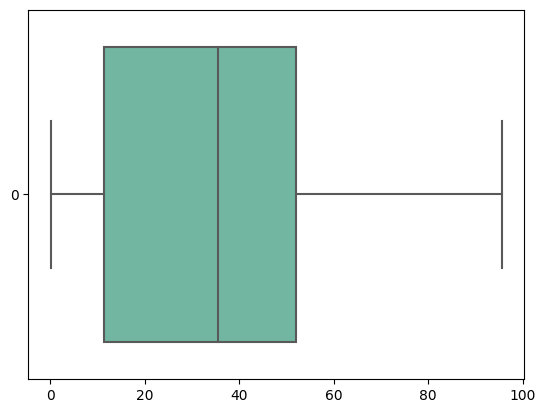

In [23]:
ax = sns.boxplot(data=df["internetuserate"], orient="h", palette="Set2")

**Obs: There are no outliers in our column.**

### Checking for Normal Distribution

<Axes: xlabel='internetuserate', ylabel='Density'>

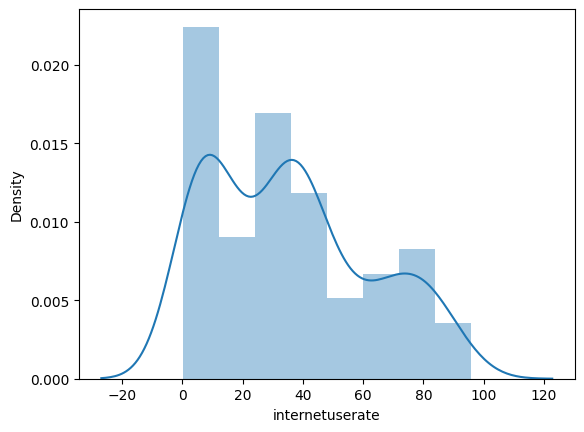

In [24]:
sns.distplot(df['internetuserate'], hist = True)

In [25]:
df["internetuserate"].skew()

0.47952161730598686

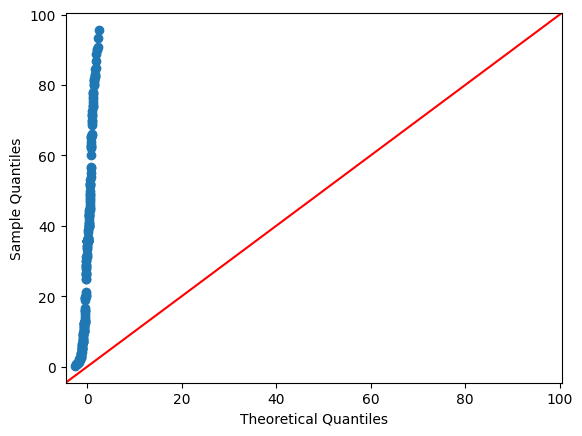

In [26]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["internetuserate"], line ='45')
py.show()

**Results: The points on this plot clearly don't fall along the red line, so we would not assume that this variable is normally distributed.**

In [27]:
from scipy.stats import shapiro
shapiro(df["internetuserate"])

ShapiroResult(statistic=0.9308421611785889, pvalue=1.757870293772612e-08)

**From the output we can see that the test statistic is 0.931 and the corresponding p-value is 1.76e-08 (extremely close to zero).**

**Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.**

**This means we have sufficient evidence to say that the sample data does not come from a normal distribution.**

### Visualisations

<Figure size 1500x800 with 0 Axes>

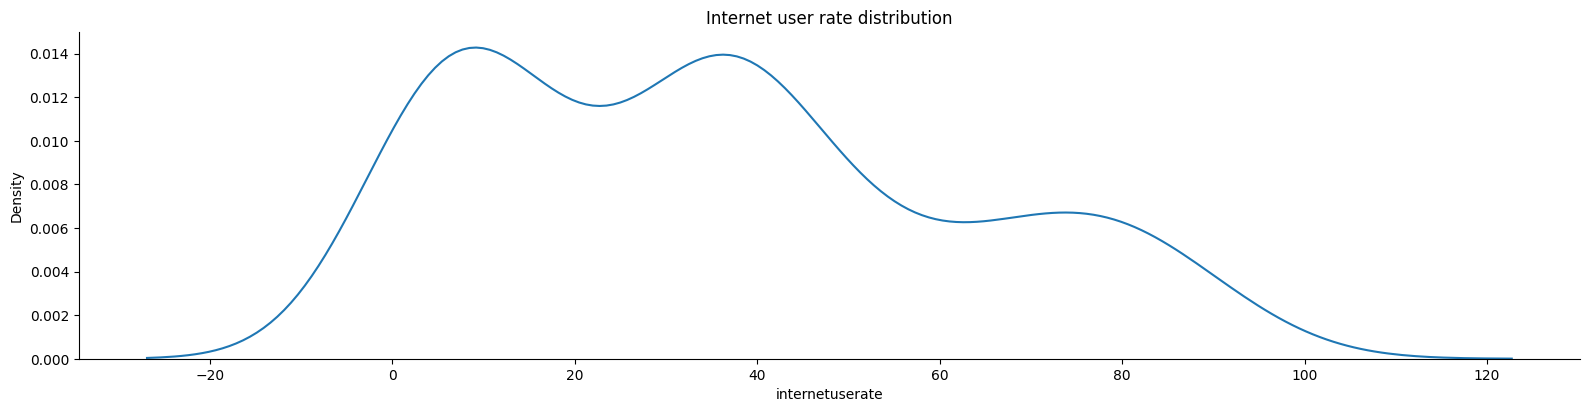

In [28]:
plt.figure(figsize = (15, 8))
sns.displot(df['internetuserate'], kind = 'kde', height=4, aspect=4).set(title = 'Internet user rate distribution')

<Axes: >

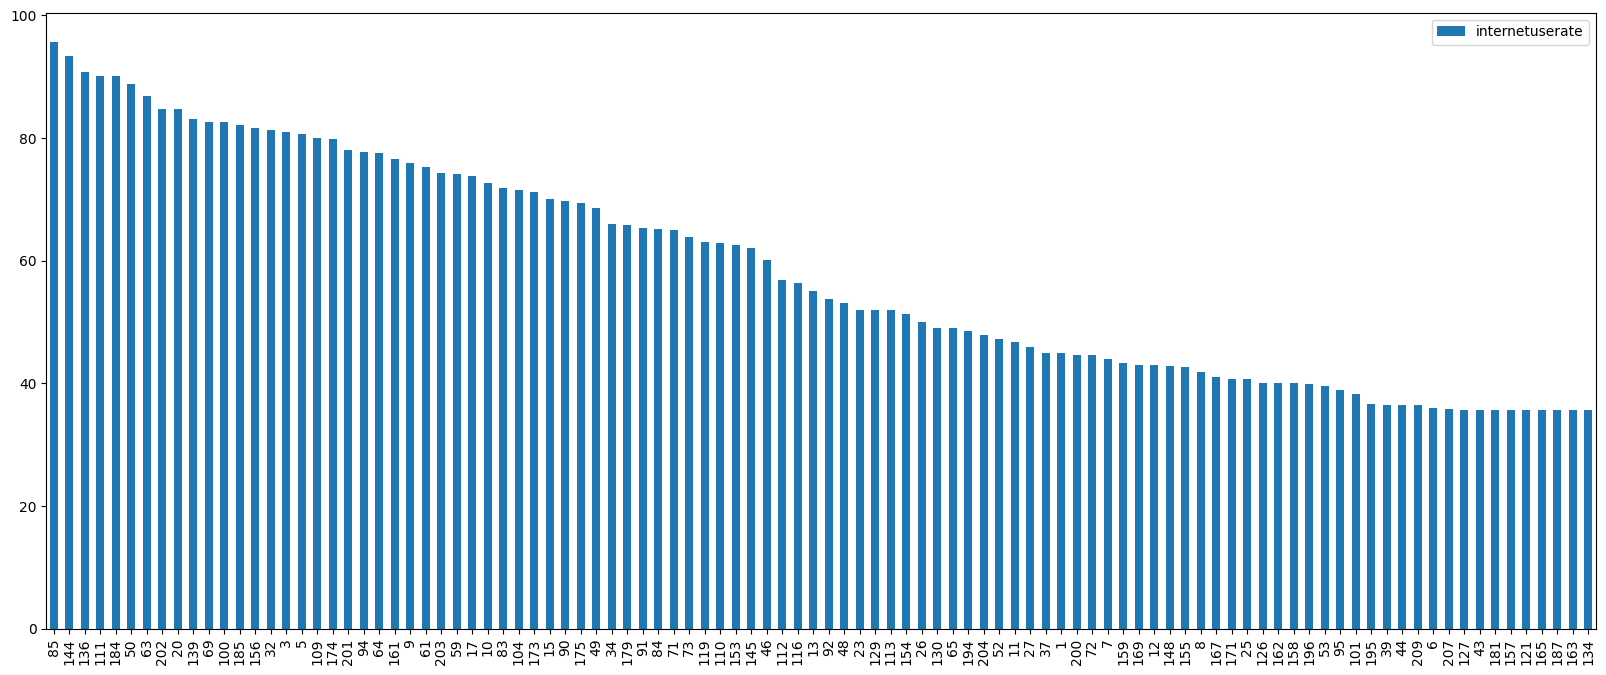

In [29]:
df.sort_values(by='internetuserate', ascending=False).head(100).plot.bar(y='internetuserate',figsize=(20,8))

In [30]:
px.choropleth(df, locations='countrycode',color='internetuserate',scope='world',
                    range_color=((0, 100)),title='Internet users (per 100 people)',height=1000)

## Income per Person
**2010 Gross Domestic Product per capita in constant 2000 US$. The
inflation but not the differences in the cost of living between countries
has been taken into account.**

In [31]:
df['incomeperperson'].value_counts()

                    23
6243.57131825833     1
268.259449511417     1
26551.8442381829     1
14778.1639288175     1
                    ..
13577.8798850901     1
20751.8934243568     1
5330.40161203986     1
1860.75389496662     1
320.771889948584     1
Name: incomeperperson, Length: 191, dtype: int64

In [32]:
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')
df['incomeperperson'] = df['incomeperperson'].astype(float)

### Dealing with Missing Values

In [33]:
df["incomeperperson"].isnull().sum()

23

In [34]:
#Mean Imputation
df["incomeperperson"] = df["incomeperperson"].fillna(df["incomeperperson"].mean())

### Checking for Normal Distribution

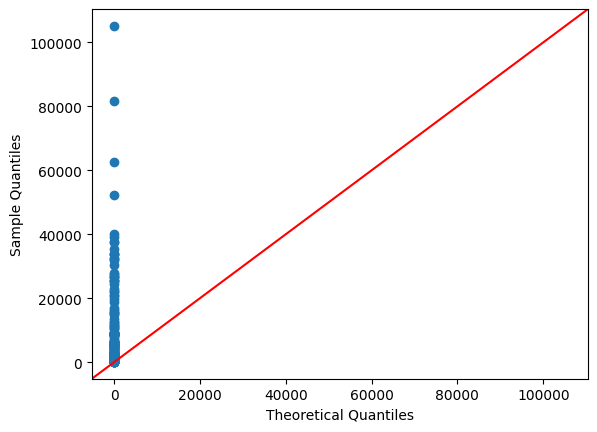

In [35]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["incomeperperson"], line ='45')
py.show()

**Results: The points on this plot clearly don't fall along the red line, so we would not assume that this variable is normally distributed.**

In [36]:
from scipy.stats import shapiro
shapiro(df["incomeperperson"])

ShapiroResult(statistic=0.626390814781189, pvalue=2.5513265180624e-21)

**From the output we can see that the test statistic is 0.626 and the corresponding p-value is 2.55e-21 (extremely close to zero).**

**Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.**

**This means we have sufficient evidence to say that the sample data does not come from a normal distribution.**

In [37]:
from scipy.stats import skew
skew(df["incomeperperson"])

3.414368317652135

<Axes: xlabel='incomeperperson', ylabel='Density'>

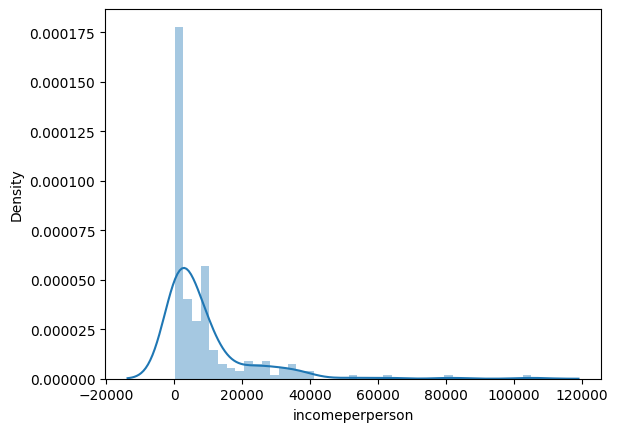

In [38]:
sns.distplot(df['incomeperperson'], hist = True)

## Checking Outliers

In [39]:
Q1 = df['incomeperperson'].quantile(0.25)
Q3 = df['incomeperperson'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
incomeperperson_outliers = df[(df['incomeperperson'] < Q1 - whisker_width*IQR) | (df['incomeperperson'] > Q3 + whisker_width*IQR)]
incomeperperson_outliers.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
3,Andorra,21943.339898,10.17,,,,,,81.000000,,,,,5.36217880249023,,88.92,AND
9,Australia,25249.986061,10.21,.4862799,83.2,12970092666.6667,54.5999984741211,.1,75.895654,81.907,1.91302610912404,10,2825.39109539914,8.4700301251191,61.5,88.74,AUS
10,Austria,26692.984107,12.4,.8155798,70.5,4466084333.33333,49.7000007629394,.3,72.731576,80.854,1.54879096611674,10,2068.12330899163,13.09437,57.0999984741211,67.16,AUT
17,Belgium,24496.048264,10.41,.8156477,92,10897025333.3333,41.7000007629394,.2,73.733934,80.009,,8,1920.96221521997,15.95385,48.5999984741211,97.36,BEL
20,Bermuda,62682.147006,,,,20331666.6666667,,,84.654514,,,,,,,100,BMU


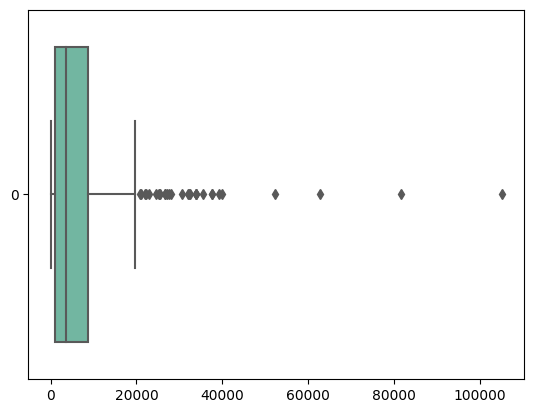

In [40]:
ax = sns.boxplot(data=df["incomeperperson"], orient="h", palette="Set2")

In [41]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "incomeperperson")
print(probable_outliers_tm)
print(possible_outliers_tm)

[20, 83, 85, 94, 109, 111, 112, 127, 144, 156, 173, 184, 185, 203]
[3, 9, 10, 17, 20, 32, 50, 63, 64, 69, 73, 83, 85, 90, 91, 94, 109, 111, 112, 127, 136, 144, 156, 165, 173, 184, 185, 201, 202, 203]


14 observations of the variable ‘crime rate per capita by town’ can be seen as probable and 30 as possible outliers and need further attention.

<Axes: xlabel='incomeperperson', ylabel='Density'>

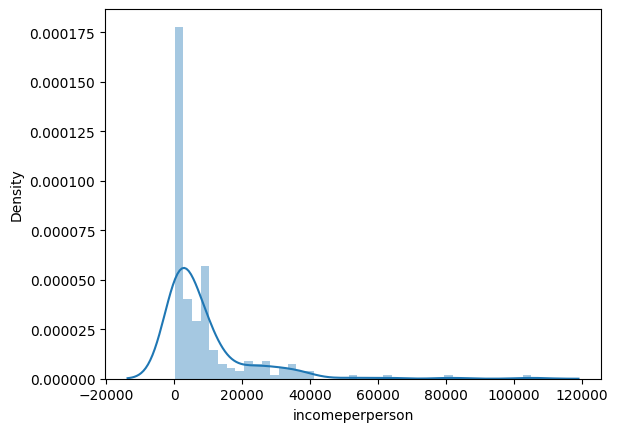

In [42]:
sns.distplot(df['incomeperperson'], hist = True)

### Handling Outliers

#### Flooring And Capping
in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the incomeperperson variable.

In [43]:
Q1 = df['incomeperperson'].quantile(0.25)
Q3 = df['incomeperperson'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
df['incomeperperson']= np.where(df['incomeperperson'] > upper_whisker, upper_whisker, np.where(df['incomeperperson'] < lower_whisker, lower_whisker, df['incomeperperson']))

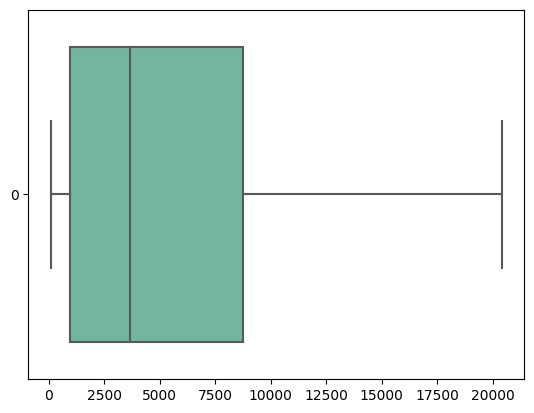

In [44]:
ax = sns.boxplot(data=df["incomeperperson"], orient="h", palette="Set2")

### Visualisations

<Figure size 1500x800 with 0 Axes>

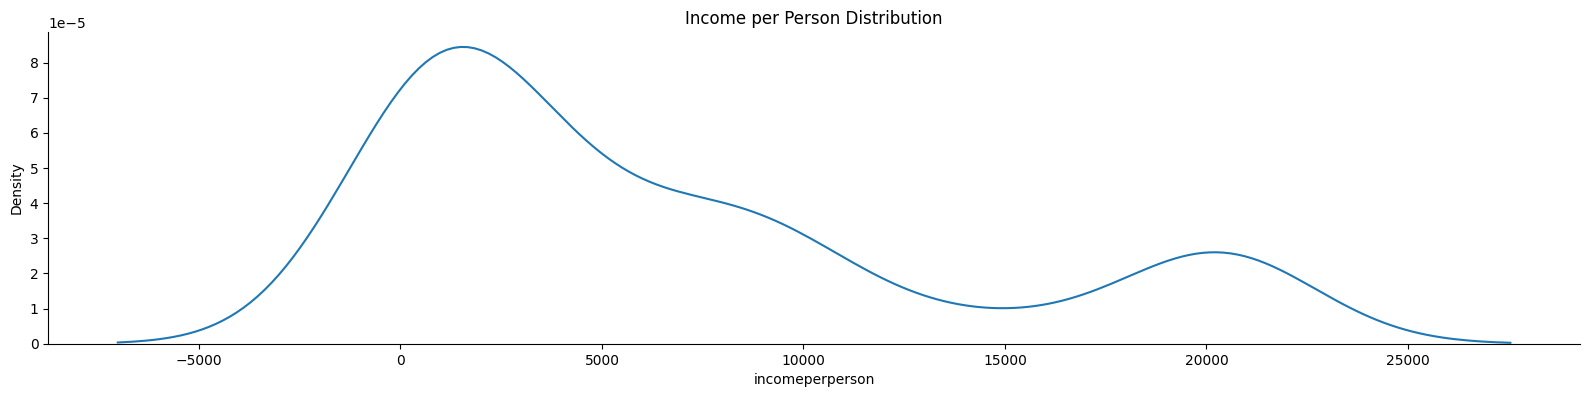

In [45]:
plt.figure(figsize = (15, 8))
sns.displot(df['incomeperperson'], kind = 'kde', height=4, aspect=4).set(title = 'Income per Person Distribution')

<Axes: >

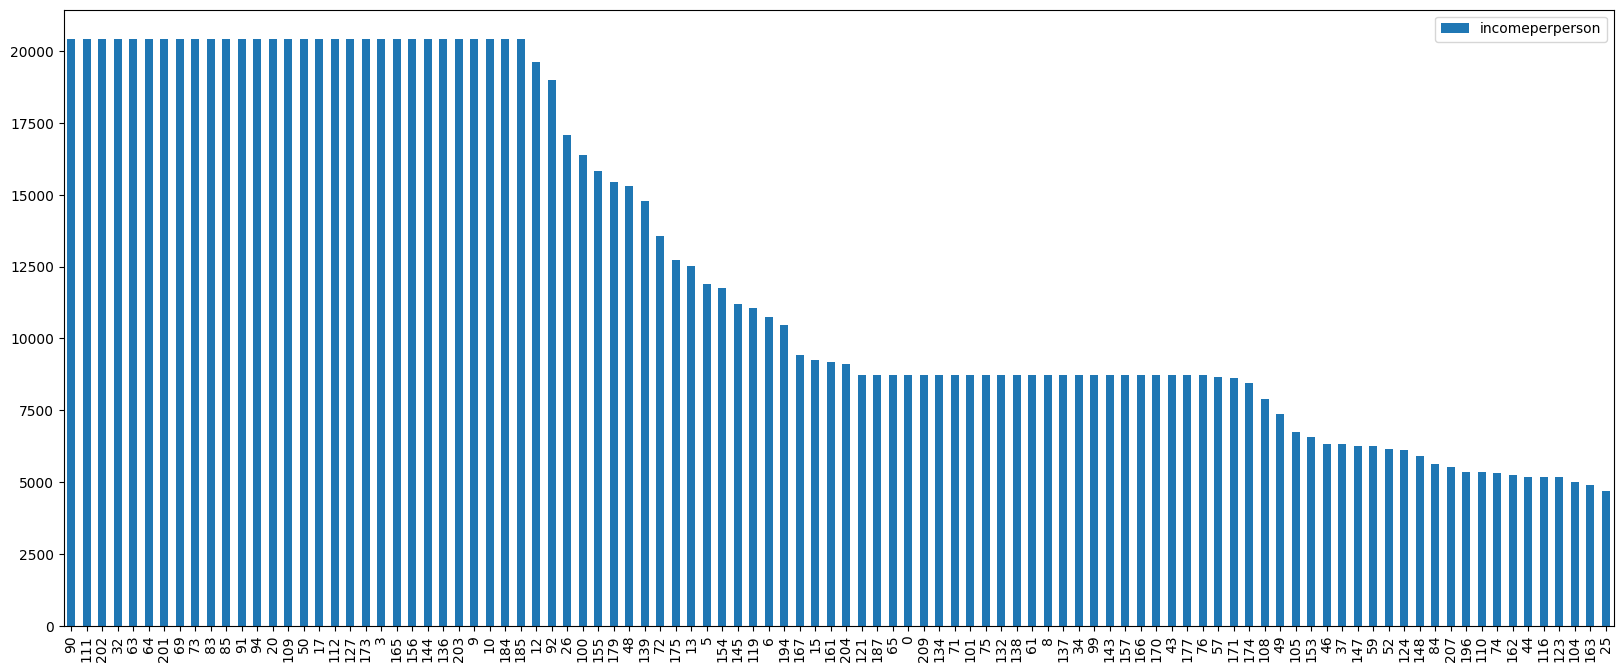

In [46]:
df.sort_values(by='incomeperperson', ascending=False).head(100).plot.bar(y='incomeperperson',figsize=(20,8))

In [85]:
px.choropleth(df,locations='countrycode',color='incomeperperson',scope='world',
                    range_color=((100, 10000)),title='Income per person',height=1000)

<Axes: xlabel='incomeperperson', ylabel='internetuserate'>

<Figure size 1200x800 with 0 Axes>

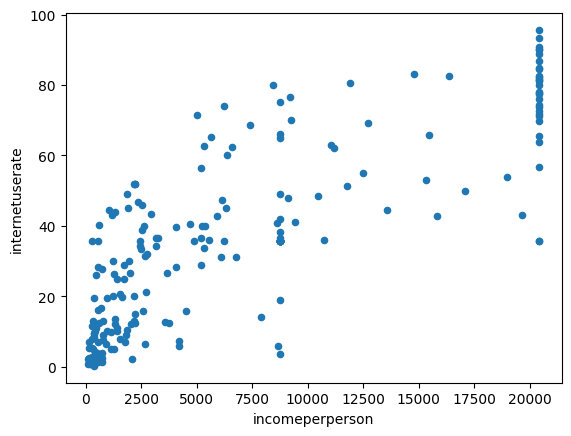

In [58]:
plt.figure(figsize = (12, 8))
df.plot.scatter(x='incomeperperson',y='internetuserate')

[Text(0.5, 1.0, 'Income per person VS Internet use rate')]

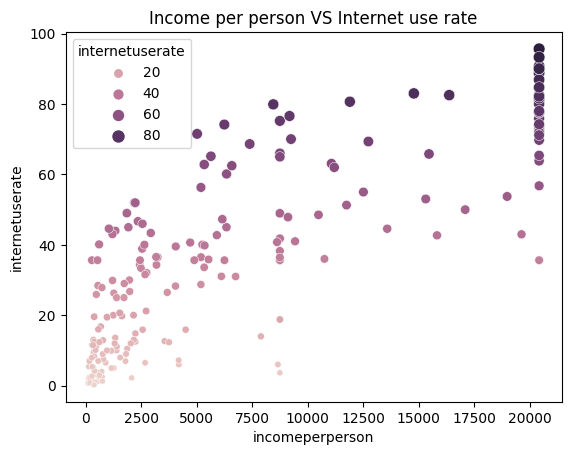

In [61]:
sns.scatterplot(x = 'incomeperperson' , y = 'internetuserate', size = 'internetuserate' ,  hue= 'internetuserate' , data = df).set(title = 'Income per person VS Internet use rate')

<Figure size 1200x800 with 0 Axes>

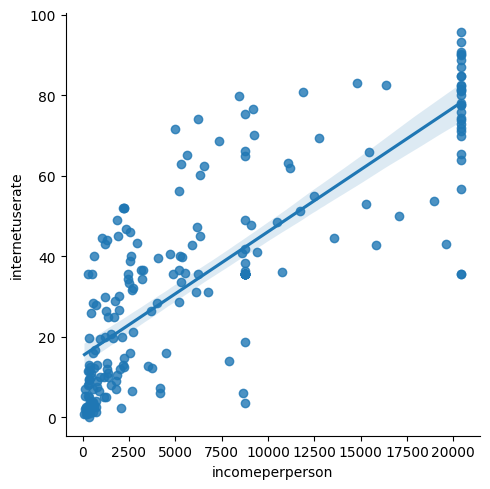

In [59]:
plt.figure(figsize = (12, 8))
sns.lmplot(x='incomeperperson',y='internetuserate',data=df)

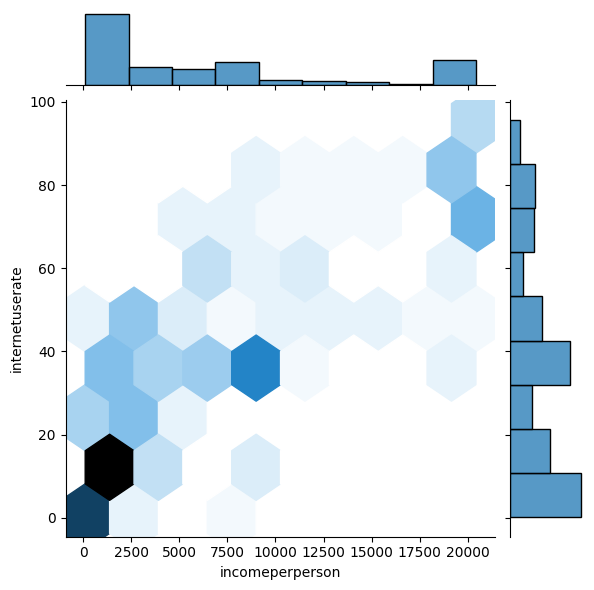

In [84]:
sns.jointplot(x = 'incomeperperson' , y = 'internetuserate' , kind = 'hex' ,  data = df)

### Employee Rate:
**2007 total employees age 15+ (% of population)
Percentage of total population, age above 15, that has been employed
during the given year.**

In [62]:
df['employrate'].value_counts()

                    35
47.2999992370606     3
59.9000015258789     3
55.9000015258789     3
61.5                 3
                    ..
71.6999969482422     1
57.2000007629394     1
56.4000015258789     1
80.6999969482422     1
66.8000030517578     1
Name: employrate, Length: 140, dtype: int64

In [63]:
df['employrate'] = pd.to_numeric(df['employrate'], errors='coerce')
df['employrate'] = df['employrate'].astype(float)

### Dealing with Missing Values

In [64]:
df["employrate"].isnull().sum()

35

In [65]:
#Mean Imputation
df["employrate"] = df["employrate"].fillna(df["employrate"].mean())

In [66]:
df["employrate"].isnull().sum()

0

### Checking for Normal Distribution

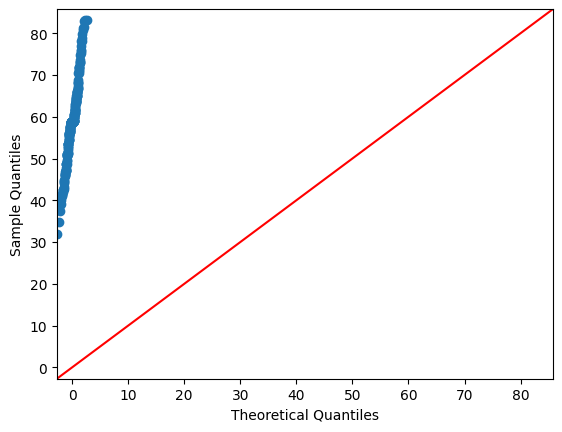

In [67]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["employrate"], line ='45')
py.show()

**Results: The points on this plot clearly don't fall along the red line, so we would not assume that this variable is normally distributed.**

In [68]:
from scipy.stats import shapiro
shapiro(df["employrate"])

ShapiroResult(statistic=0.9729774594306946, pvalue=0.0004120544472243637)

**Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.**

**This means we have sufficient evidence to say that the sample data does not come from a normal distribution.**

### Checking Skewness

In [69]:
from scipy.stats import skew
skew(df["employrate"])

0.15168186236454806

<Axes: xlabel='employrate', ylabel='Density'>

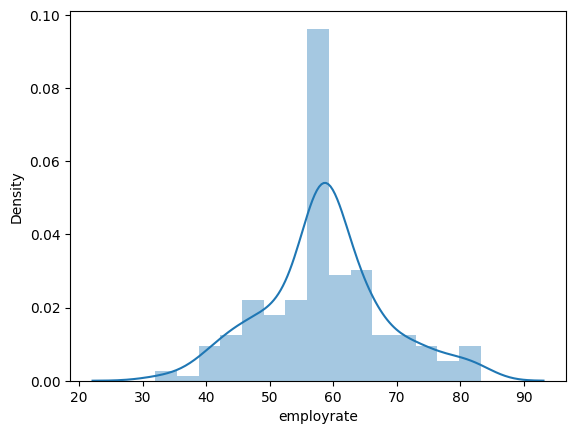

In [70]:
sns.distplot(df['employrate'], hist = True)

## Checking Outliers

In [71]:
Q1 = df['employrate'].quantile(0.25)
Q3 = df['employrate'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
incomeperperson_outliers = df[(df['employrate'] < Q1 - whisker_width*IQR) | (df['employrate'] > Q3 + whisker_width*IQR)]
incomeperperson_outliers.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
country,,,,,,,,,,,,,,,,
Burkina Faso,276.200413,7.32,.1629041,30.6,20628666.6666667,75.8000030517578,1.2,1.400061,55.439,,0,,8.20422172546387,81.300003,19.56,BFA
Burundi,115.305996,9.65,1.1577498,19.5,8092333.33333333,83.3000030517578,3.3,2.100213,50.411,,6,,14.6809358596802,83.199997,10.4,BDI
Ethiopia,220.891248,4.1,.3617085,24.7,119958666.666667,73,,0.749996,59.274,,1,15.0562359104808,10.0719423294067,80.699997,17,ETH
Guinea,411.501447,.79,.4026995,15.3,46684000,77.5999984741211,1.3,0.999959,54.097,,-1,,7.44382619857788,81.500000,34.44,GIN
Iraq,736.268054,.47,7.7379125,31.7,2421917666.66667,12.3999996185303,,2.471948,69.042,,0,0,17.0326461791992,37.400002,66.6,IRQ


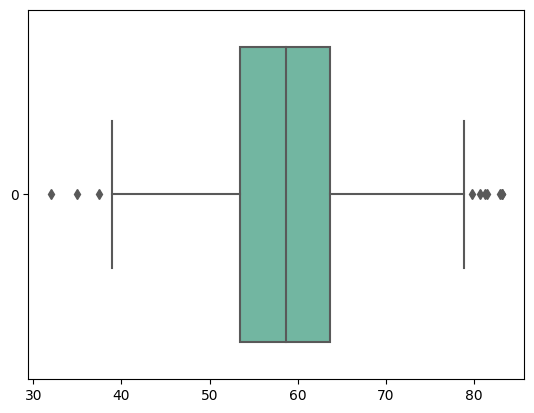

In [72]:
ax = sns.boxplot(data=df["employrate"], orient="h", palette="Set2")

In [73]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "employrate")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[28, 29, 60, 78, 89, 113, 114, 160, 199, 209]


### Handling Outliers

In [74]:
Q1 = df['employrate'].quantile(0.25)
Q3 = df['employrate'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
df['employrate']= np.where(df['employrate'] > upper_whisker, upper_whisker, np.where(df['employrate'] < lower_whisker, lower_whisker, df['employrate']))

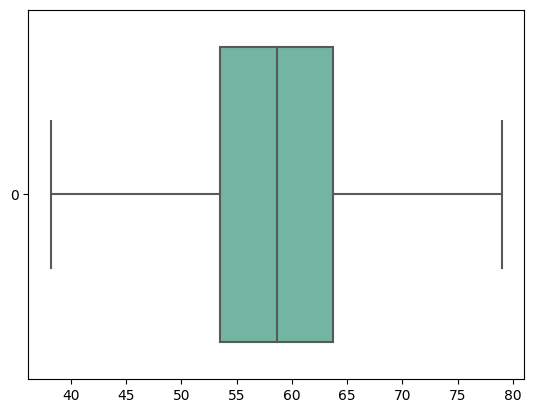

In [75]:
ax = sns.boxplot(data=df["employrate"], orient="h", palette="Set2")

### Visualisations

<Figure size 1500x800 with 0 Axes>

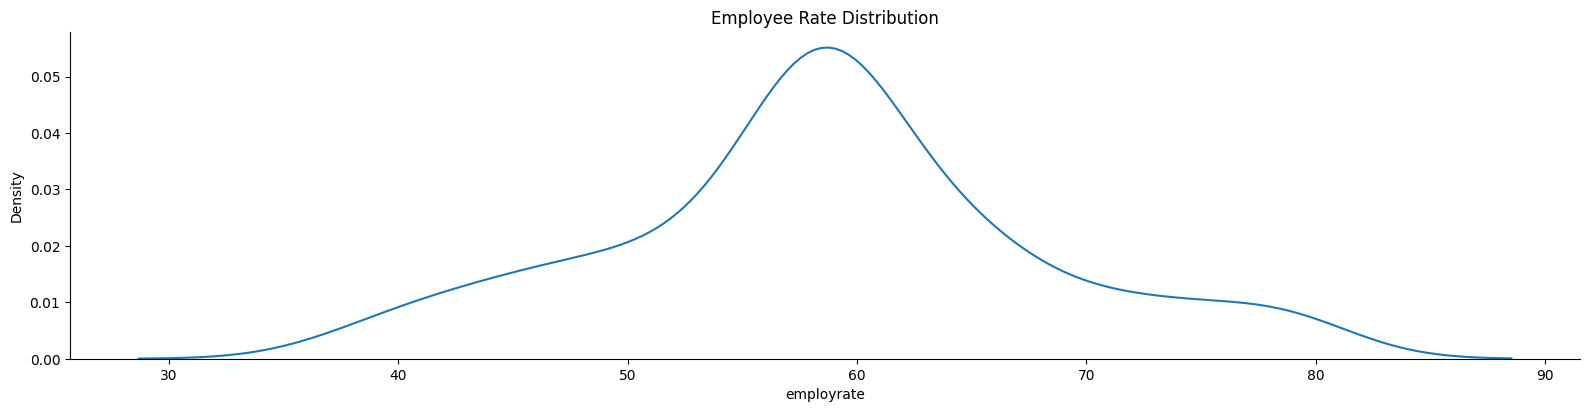

In [76]:
plt.figure(figsize = (15, 8))
sns.displot(df['employrate'], kind = 'kde', height=4, aspect=4).set(title = 'Employee Rate Distribution')

<Axes: xlabel='country'>

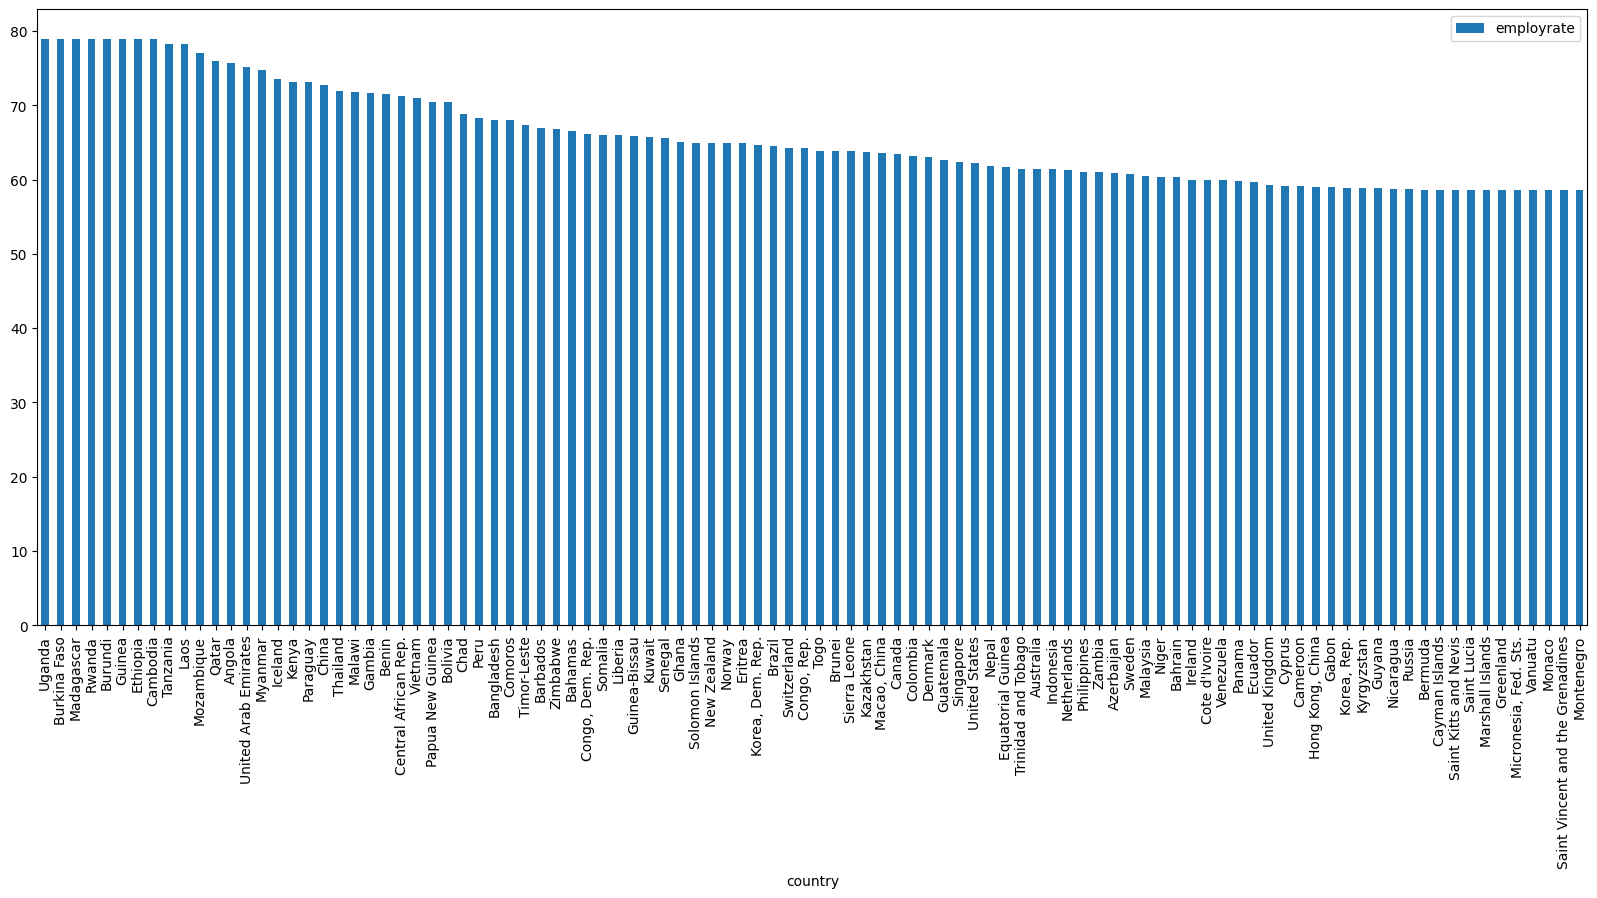

In [78]:
df.sort_values(by='employrate', ascending=False).head(100).plot.bar(y='employrate',figsize=(20,8))

In [77]:
px.choropleth(df, locations='countrycode',color='employrate',scope='world',
                    range_color=((0, 100)),title='Employee Rate Distribution',height=1000)

### Urban Rate
2008 urban population (% of total)
Urban population refers to people living in urban areas as defined by
national statistical offices (calculated using World Bank population
estimates and urban ratios from the United Nations World Urbanization
Prospects)

In [89]:
df["urbanrate"].value_counts()

         10
100       6
27.84     2
36.84     2
65.58     2
         ..
83.52     1
30.84     1
93.16     1
48.58     1
37.34     1
Name: urbanrate, Length: 195, dtype: int64

In [95]:
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')
df['urbanrate'] = df['urbanrate'].astype(float)

### Dealing with Missing Values

In [96]:
df["urbanrate"].isnull().sum()

10

In [97]:
#Mean Imputation
df["urbanrate"] = df["urbanrate"].fillna(df["urbanrate"].mean())

In [98]:
df["urbanrate"].isnull().sum()

0

### Checking for Normal Distribution

<Axes: xlabel='urbanrate', ylabel='Density'>

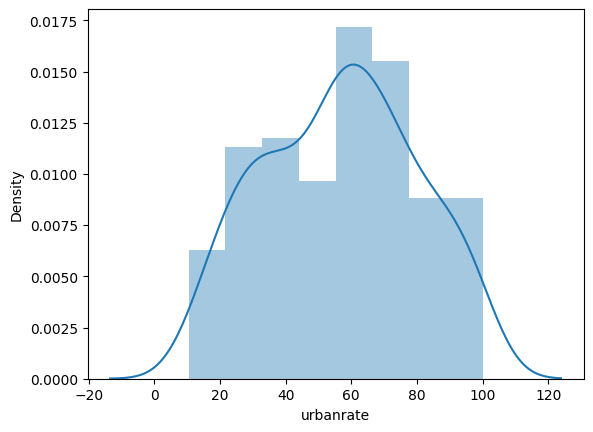

In [99]:
sns.distplot(df['urbanrate'], hist = True)

In [100]:
df["urbanrate"].skew()

-0.019299549769154375

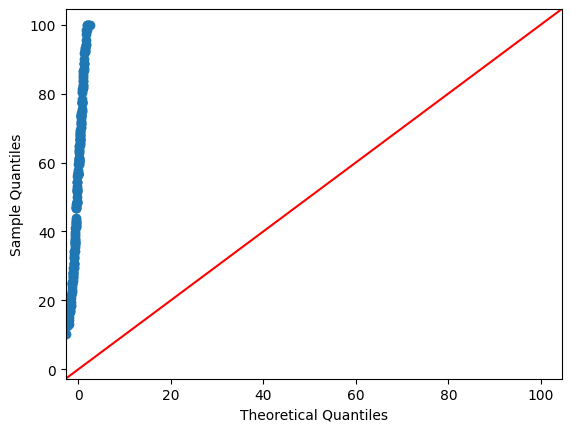

In [102]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["urbanrate"], line ='45')
py.show()

In [103]:
from scipy.stats import shapiro
shapiro(df["urbanrate"])

ShapiroResult(statistic=0.9759339690208435, pvalue=0.001045055454596877)

### Visualisations

<Figure size 1500x800 with 0 Axes>

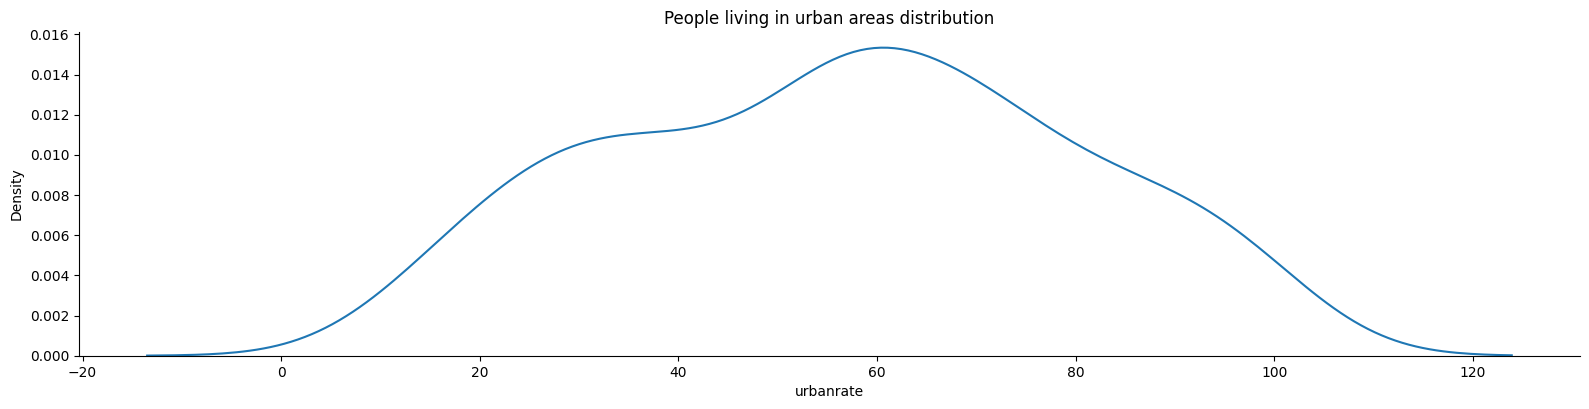

In [104]:
plt.figure(figsize = (15, 8))
sns.displot(df['urbanrate'], kind = 'kde', height=4, aspect=4).set(title = 'People living in urban areas distribution')

<Axes: xlabel='country'>

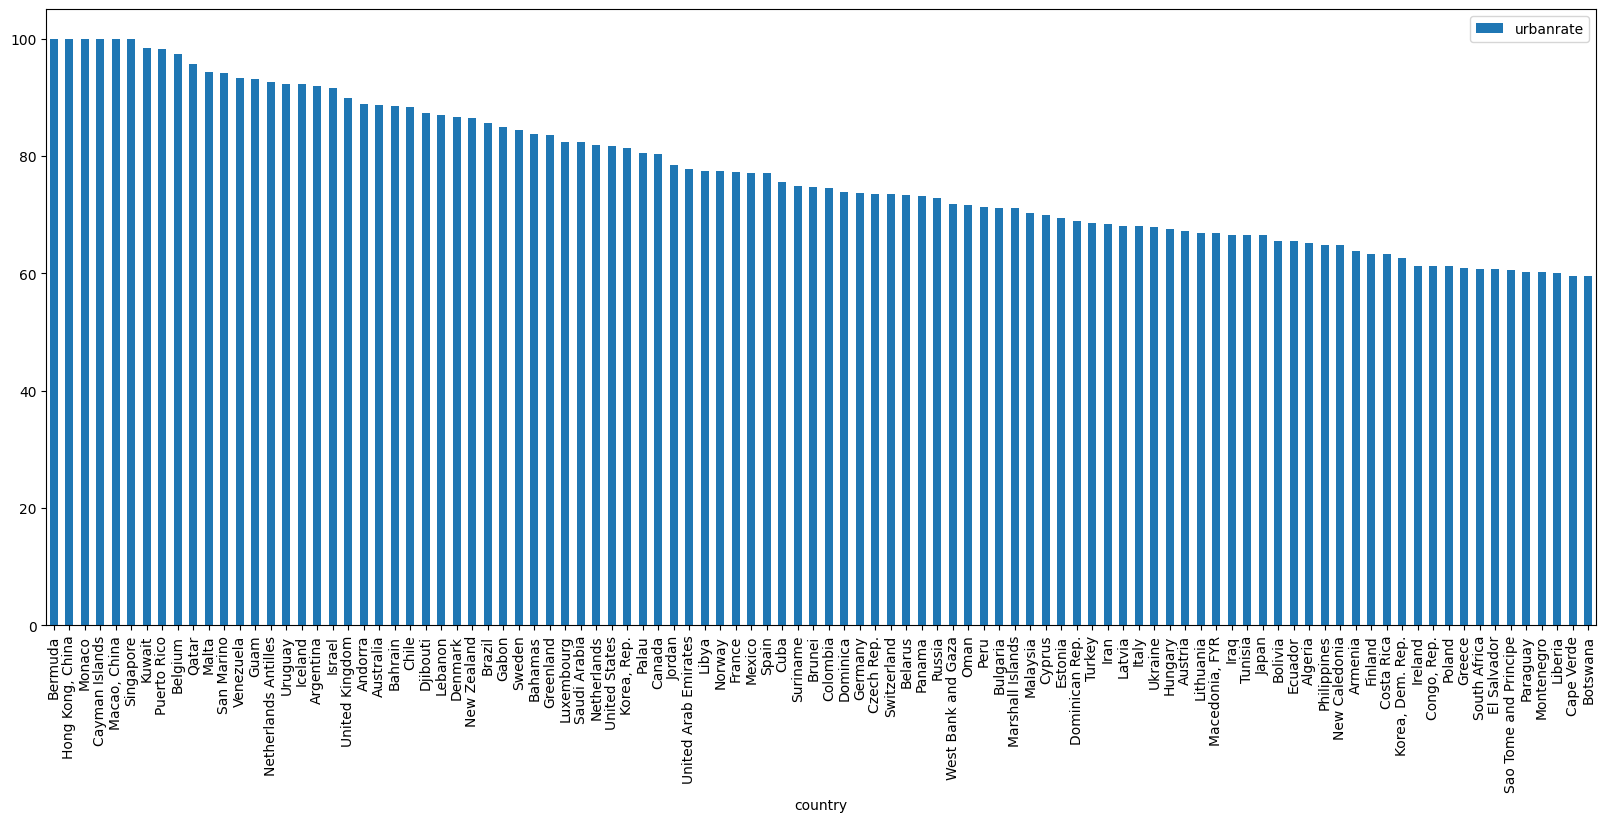

In [105]:
df.sort_values(by='urbanrate', ascending=False).head(100).plot.bar(y='urbanrate',figsize=(20,8))

In [106]:
px.choropleth(df, locations='countrycode',color='urbanrate',scope='world',
                    range_color=((0, 100)),title='Urban Area Distribution',height=1000)

<Axes: xlabel='urbanrate', ylabel='internetuserate'>

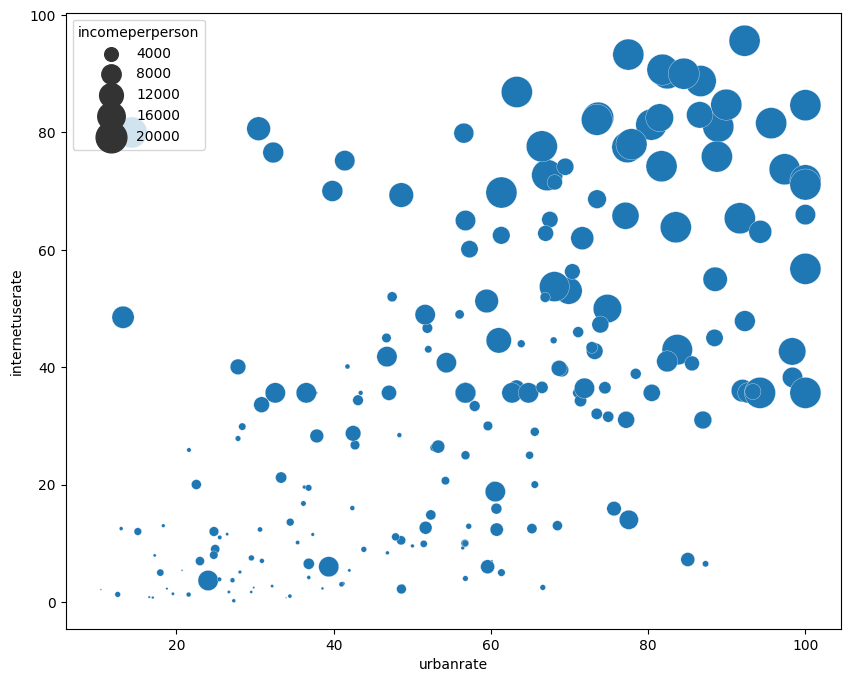

In [157]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='urbanrate', y='internetuserate', size='incomeperperson', alpha=1, data=df,sizes=(1,500))

### Female Employee Rate
2007 female employees age 15+ (% of population)
Percentage of female population, age above 15, that has been
employed during the given year.

In [123]:
df["femaleemployrate"].value_counts()

                    35
42.0999984741211     4
51.2999992370606     3
47.0999984741211     3
39.5999984741211     3
                    ..
52.0999984741211     1
51.7000007629394     1
44.7999992370606     1
18.2000007629395     1
53.5                 1
Name: femaleemployrate, Length: 154, dtype: int64

In [124]:
df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'], errors='coerce')
df["femaleemployrate"] = df["femaleemployrate"].astype(float)

### Dealing with Missing Values

In [125]:
df["femaleemployrate"].isnull().sum()

35

In [127]:
df["femaleemployrate"] = df["femaleemployrate"].fillna(df["femaleemployrate"].mean())
df["femaleemployrate"].isnull().sum()

0

### Checking for Normal Distribution

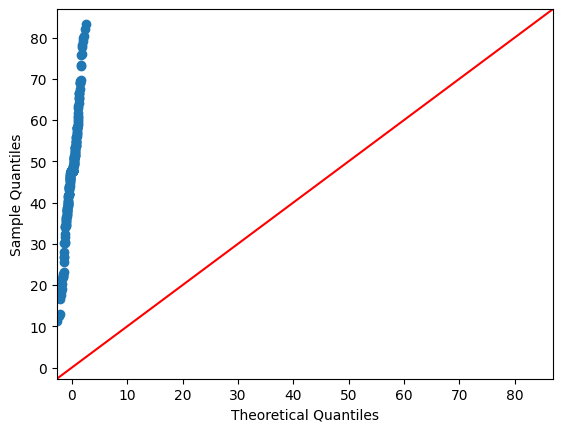

In [128]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["femaleemployrate"], line ='45')
py.show()

In [129]:
from scipy.stats import shapiro
shapiro(df["femaleemployrate"])

ShapiroResult(statistic=0.9679739475250244, pvalue=9.323465928900987e-05)

<Axes: xlabel='femaleemployrate', ylabel='Density'>

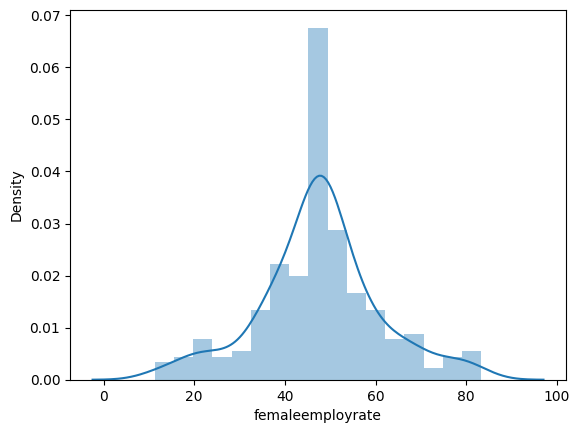

In [130]:
sns.distplot(df['femaleemployrate'], hist = True)

## Checking Outliers

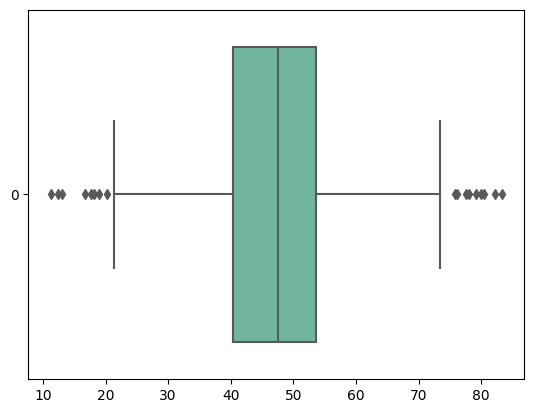

In [131]:
ax = sns.boxplot(data=df["femaleemployrate"], orient="h", palette="Set2")

In [132]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "femaleemployrate")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[28, 29, 55, 78, 89, 95, 103, 114, 131, 146, 160, 167, 186, 189, 199, 209, 210]


### Handling Outliers

In [133]:
Q1 = df['femaleemployrate'].quantile(0.25)
Q3 = df['femaleemployrate'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
df['femaleemployrate']= np.where(df['femaleemployrate'] > upper_whisker, upper_whisker, np.where(df['femaleemployrate'] < lower_whisker, lower_whisker, df['femaleemployrate']))

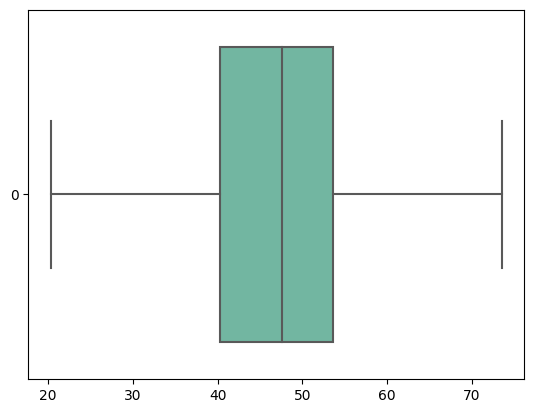

In [134]:
ax = sns.boxplot(data=df["femaleemployrate"], orient="h", palette="Set2")

### Visualisations

<Figure size 1500x800 with 0 Axes>

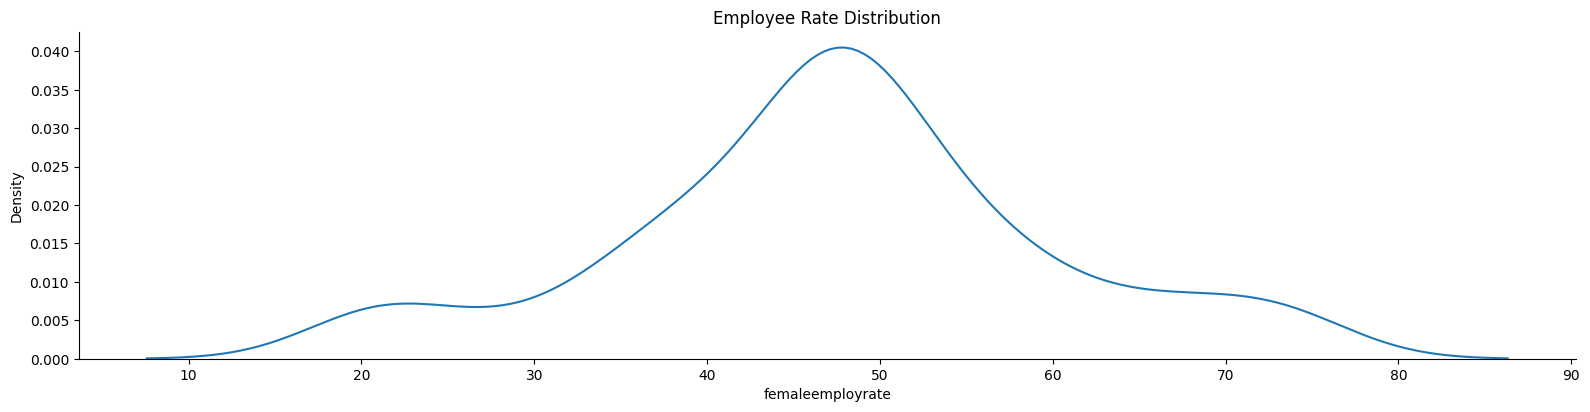

In [135]:
plt.figure(figsize = (15, 8))
sns.displot(df['femaleemployrate'], kind = 'kde', height=4, aspect=4).set(title = 'Employee Rate Distribution')

<Axes: xlabel='country'>

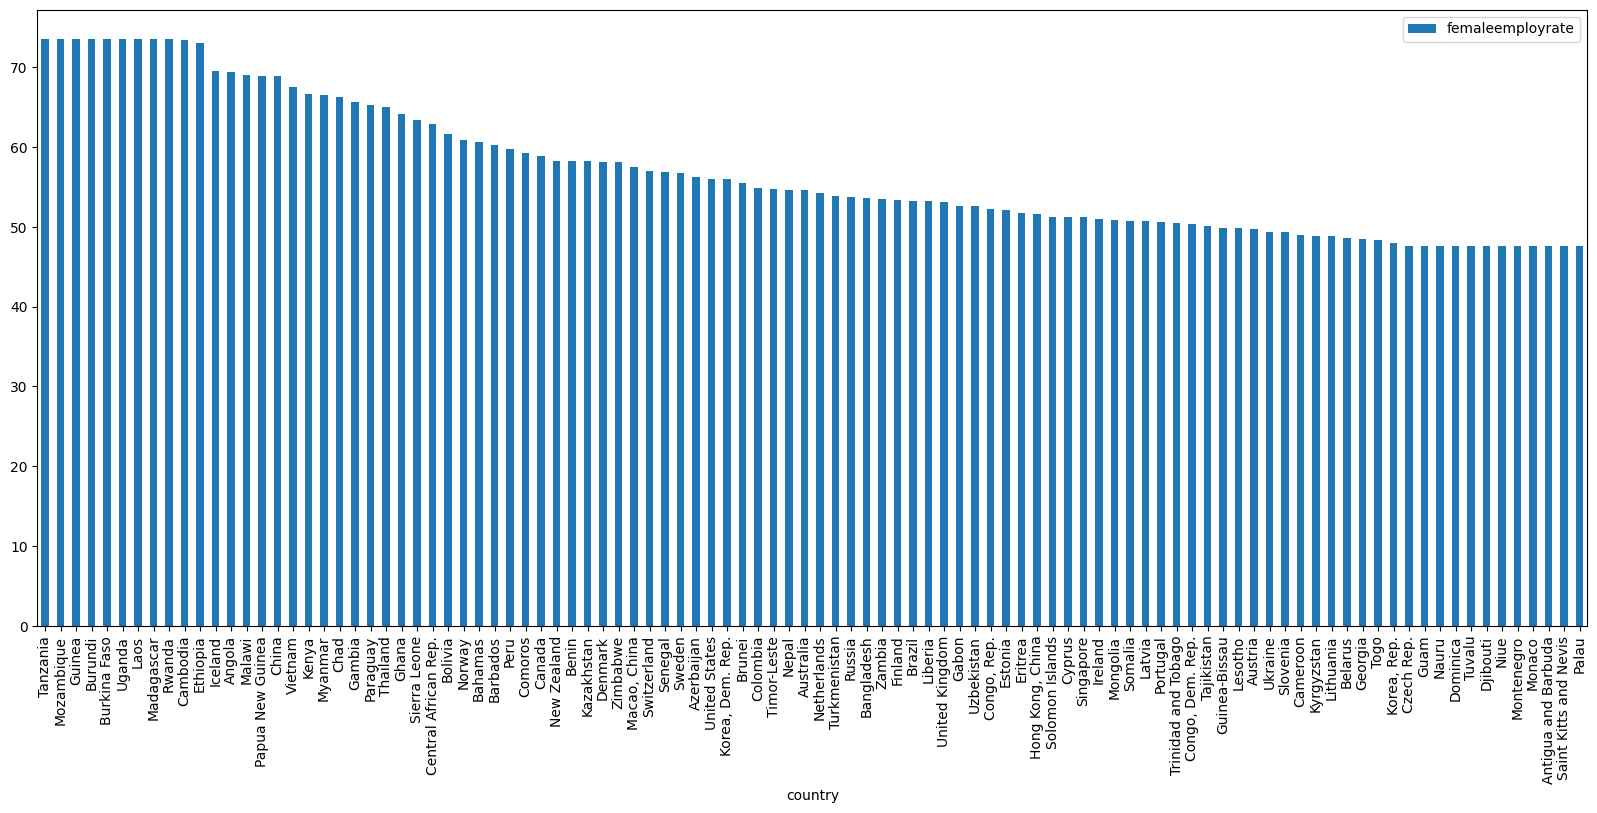

In [136]:
df.sort_values(by='femaleemployrate', ascending=False).head(100).plot.bar(y='femaleemployrate',figsize=(20,8))

In [137]:
px.choropleth(df,locations='countrycode',color='femaleemployrate',scope='world',
                    range_color=((100, 10000)),title='Income per person',height=1000)

### Polity Score
2009 Democracy score (Polity)
Overall polity score from the Polity IV dataset, calculated by
subtracting an autocracy score from a democracy score. The summary
measure of a country's democratic and free nature. -10 is the lowest
value, 10 the highest.

In [140]:
df["polityscore"].value_counts()

       52
10     33
8      19
9      15
7      13
-7     12
6      10
5       7
-3      6
-4      6
0       6
-2      5
-1      4
-9      4
4       4
2       3
1       3
-6      3
3       2
-5      2
-8      2
-10     2
Name: polityscore, dtype: int64

In [143]:
df['polityscore'] = pd.to_numeric(df['polityscore'], errors='coerce')
df["polityscore"] = df["polityscore"].astype(float)

### Dealing with Missing Values

In [144]:
df["polityscore"].isnull().sum()

52

In [145]:
df["polityscore"] = df["polityscore"].fillna(df["polityscore"].mean())

In [146]:
df["polityscore"].isnull().sum()

0

### Checking for Normal Distribution

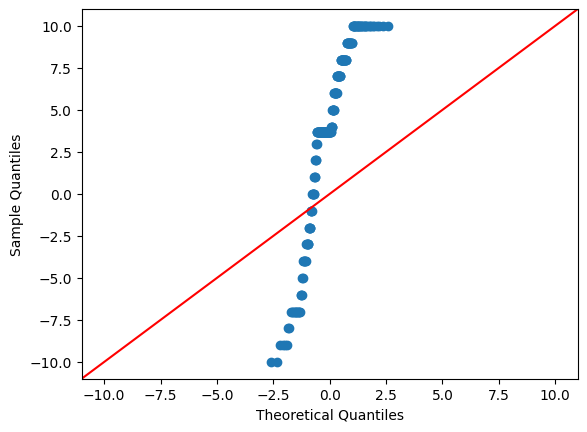

In [147]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["polityscore"], line ='45')
py.show()

In [148]:
from scipy.stats import shapiro
shapiro(df["polityscore"])

ShapiroResult(statistic=0.8898118138313293, pvalue=2.2179683437095754e-11)

<Axes: xlabel='polityscore', ylabel='Density'>

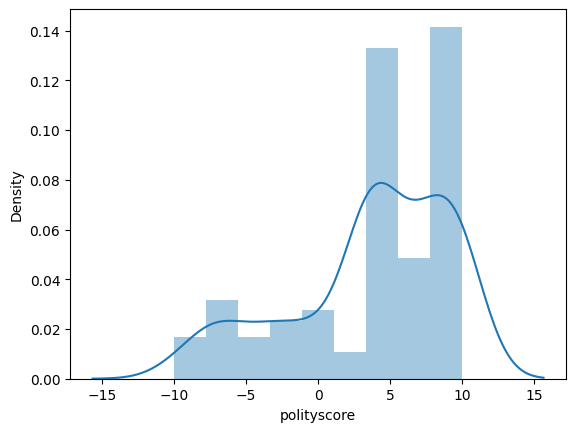

In [149]:
sns.distplot(df['polityscore'], hist = True)

## Checking Outliers

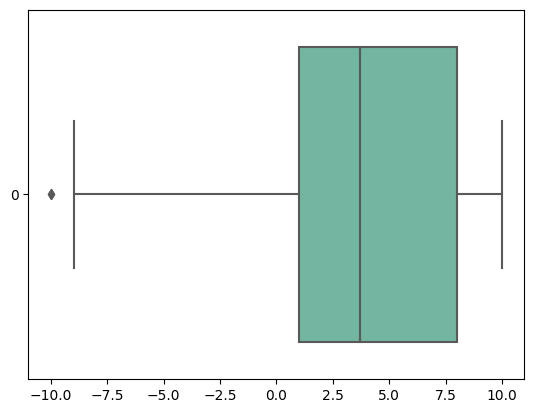

In [150]:
ax = sns.boxplot(data=df["polityscore"], orient="h", palette="Set2")

In [151]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "polityscore")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[156, 167]


### Visualisations

<Figure size 1500x800 with 0 Axes>

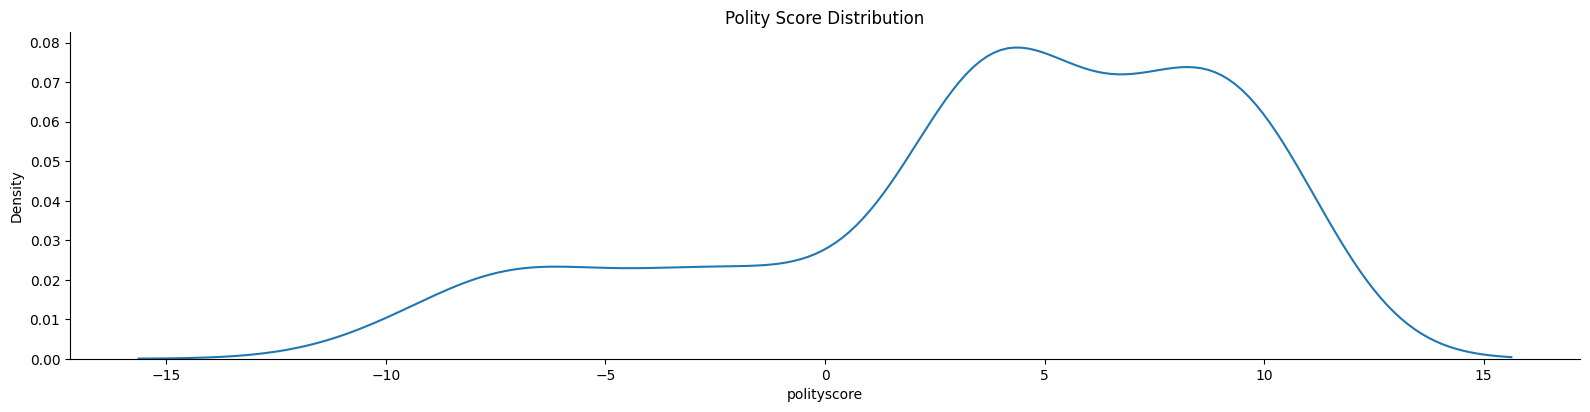

In [152]:
plt.figure(figsize = (15, 8))
sns.displot(df['polityscore'], kind = 'kde', height=4, aspect=4).set(title = 'Polity Score Distribution')

<Axes: xlabel='country'>

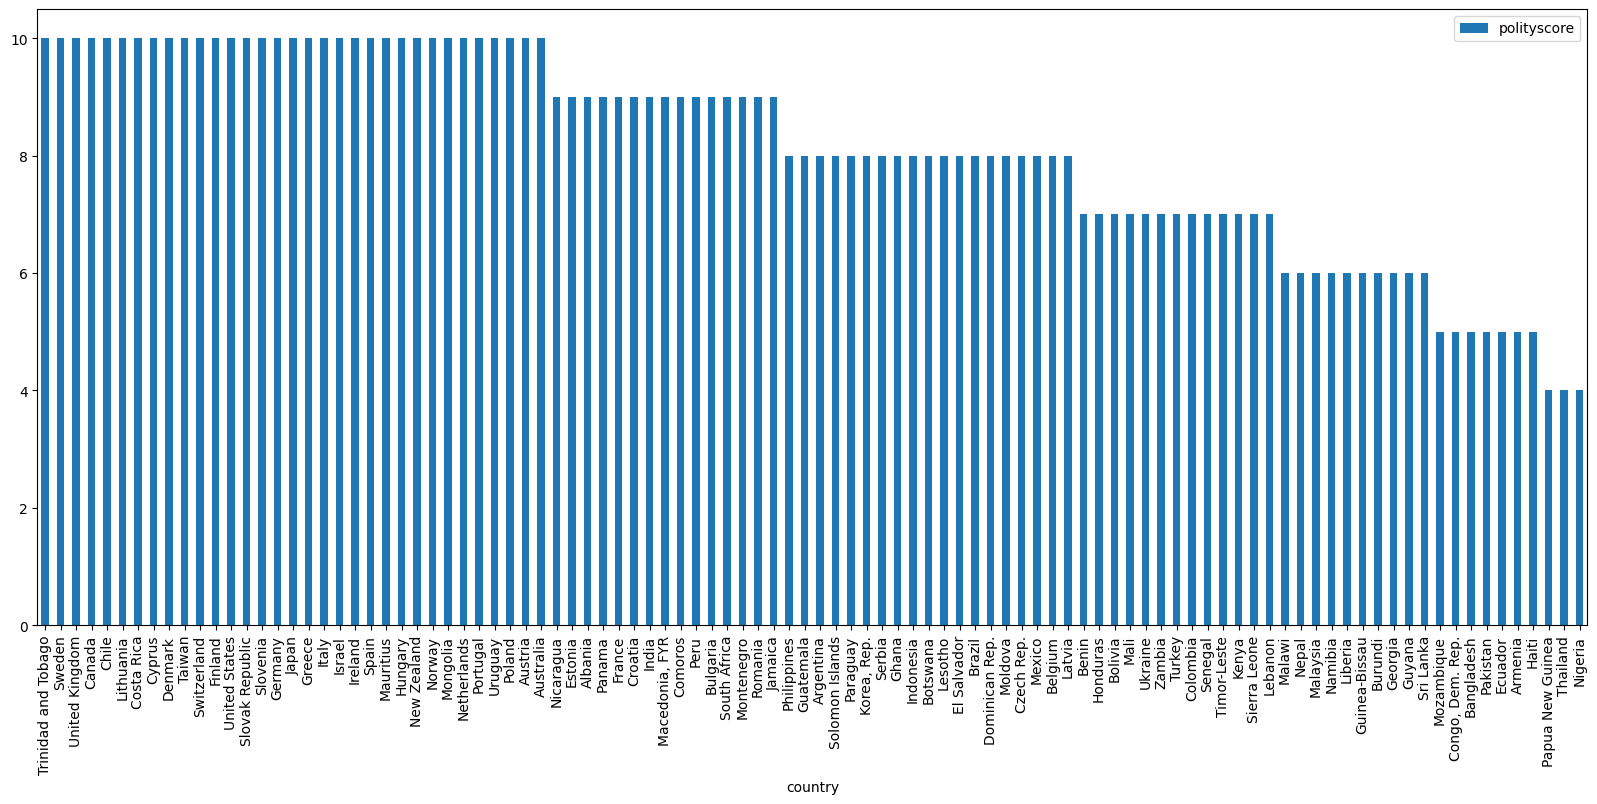

In [153]:
df.sort_values(by='polityscore', ascending=False).head(100).plot.bar(y='polityscore',figsize=(20,8))

In [156]:
px.choropleth(df,locations='countrycode',color='polityscore',scope='world',
                    range_color=((100, 10000)),title='Polity Score Distribution',height=1000)